Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not



In [44]:
pip install category_encoders


Note: you may need to restart the kernel to use updated packages.


In [45]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
!pip install catergorical_encoders
import warnings
warnings.filterwarnings("ignore")
import category_encoders as ce



ERROR: Could not find a version that satisfies the requirement catergorical_encoders (from versions: none)
ERROR: No matching distribution found for catergorical_encoders


In [46]:
data=pd.read_csv('Fraud_check (1).csv')
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# EDA

In [47]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [48]:
data.describe()


,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [49]:
encoder=ce.OrdinalEncoder(cols=['Undergrad', 'Marital.Status', 'Urban'])
data1=encoder.fit_transform(data)

In [50]:
tax_val = []
for value in data["Taxable.Income"]:
    if value<=30000:
        tax_val.append("Risky")
    else:
        tax_val.append("Good")
        
data1["tax_val"]= tax_val

In [51]:
data1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_val
0,1,1,68833,50047,10,1,Good
1,2,2,33700,134075,18,1,Good
2,1,3,36925,160205,30,1,Good
3,2,1,50190,193264,15,1,Good
4,1,3,81002,27533,28,2,Good
...,...,...,...,...,...,...,...
595,2,2,76340,39492,7,1,Good
596,2,2,69967,55369,2,1,Good
597,1,2,47334,154058,0,1,Good
598,2,3,98592,180083,17,2,Good


In [52]:
x = data1.drop(['tax_val','Taxable.Income'], axis =1)
y = data1['tax_val']

In [53]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: tax_val, Length: 600, dtype: object

# Splitting Data X and Y

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)


# Building Decision Tree Classifier using Entropy Criteria

In [55]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=2)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [56]:
preds = model.predict(x_test)  
pd.Series(preds).value_counts()

Good    180
dtype: int64

In [57]:
pd.crosstab(y_test,preds)


col_0,Good
tax_val,
Good,140
Risky,40


In [58]:
np.mean(preds==y_test)


0.7777777777777778

In [59]:
print(classification_report(preds,y_test))


              precision    recall  f1-score   support

        Good       1.00      0.78      0.88       180
       Risky       0.00      0.00      0.00         0

    accuracy                           0.78       180
   macro avg       0.50      0.39      0.44       180
weighted avg       1.00      0.78      0.88       180



Text(0.5, 1.0, 'Decision tree using Entropy')

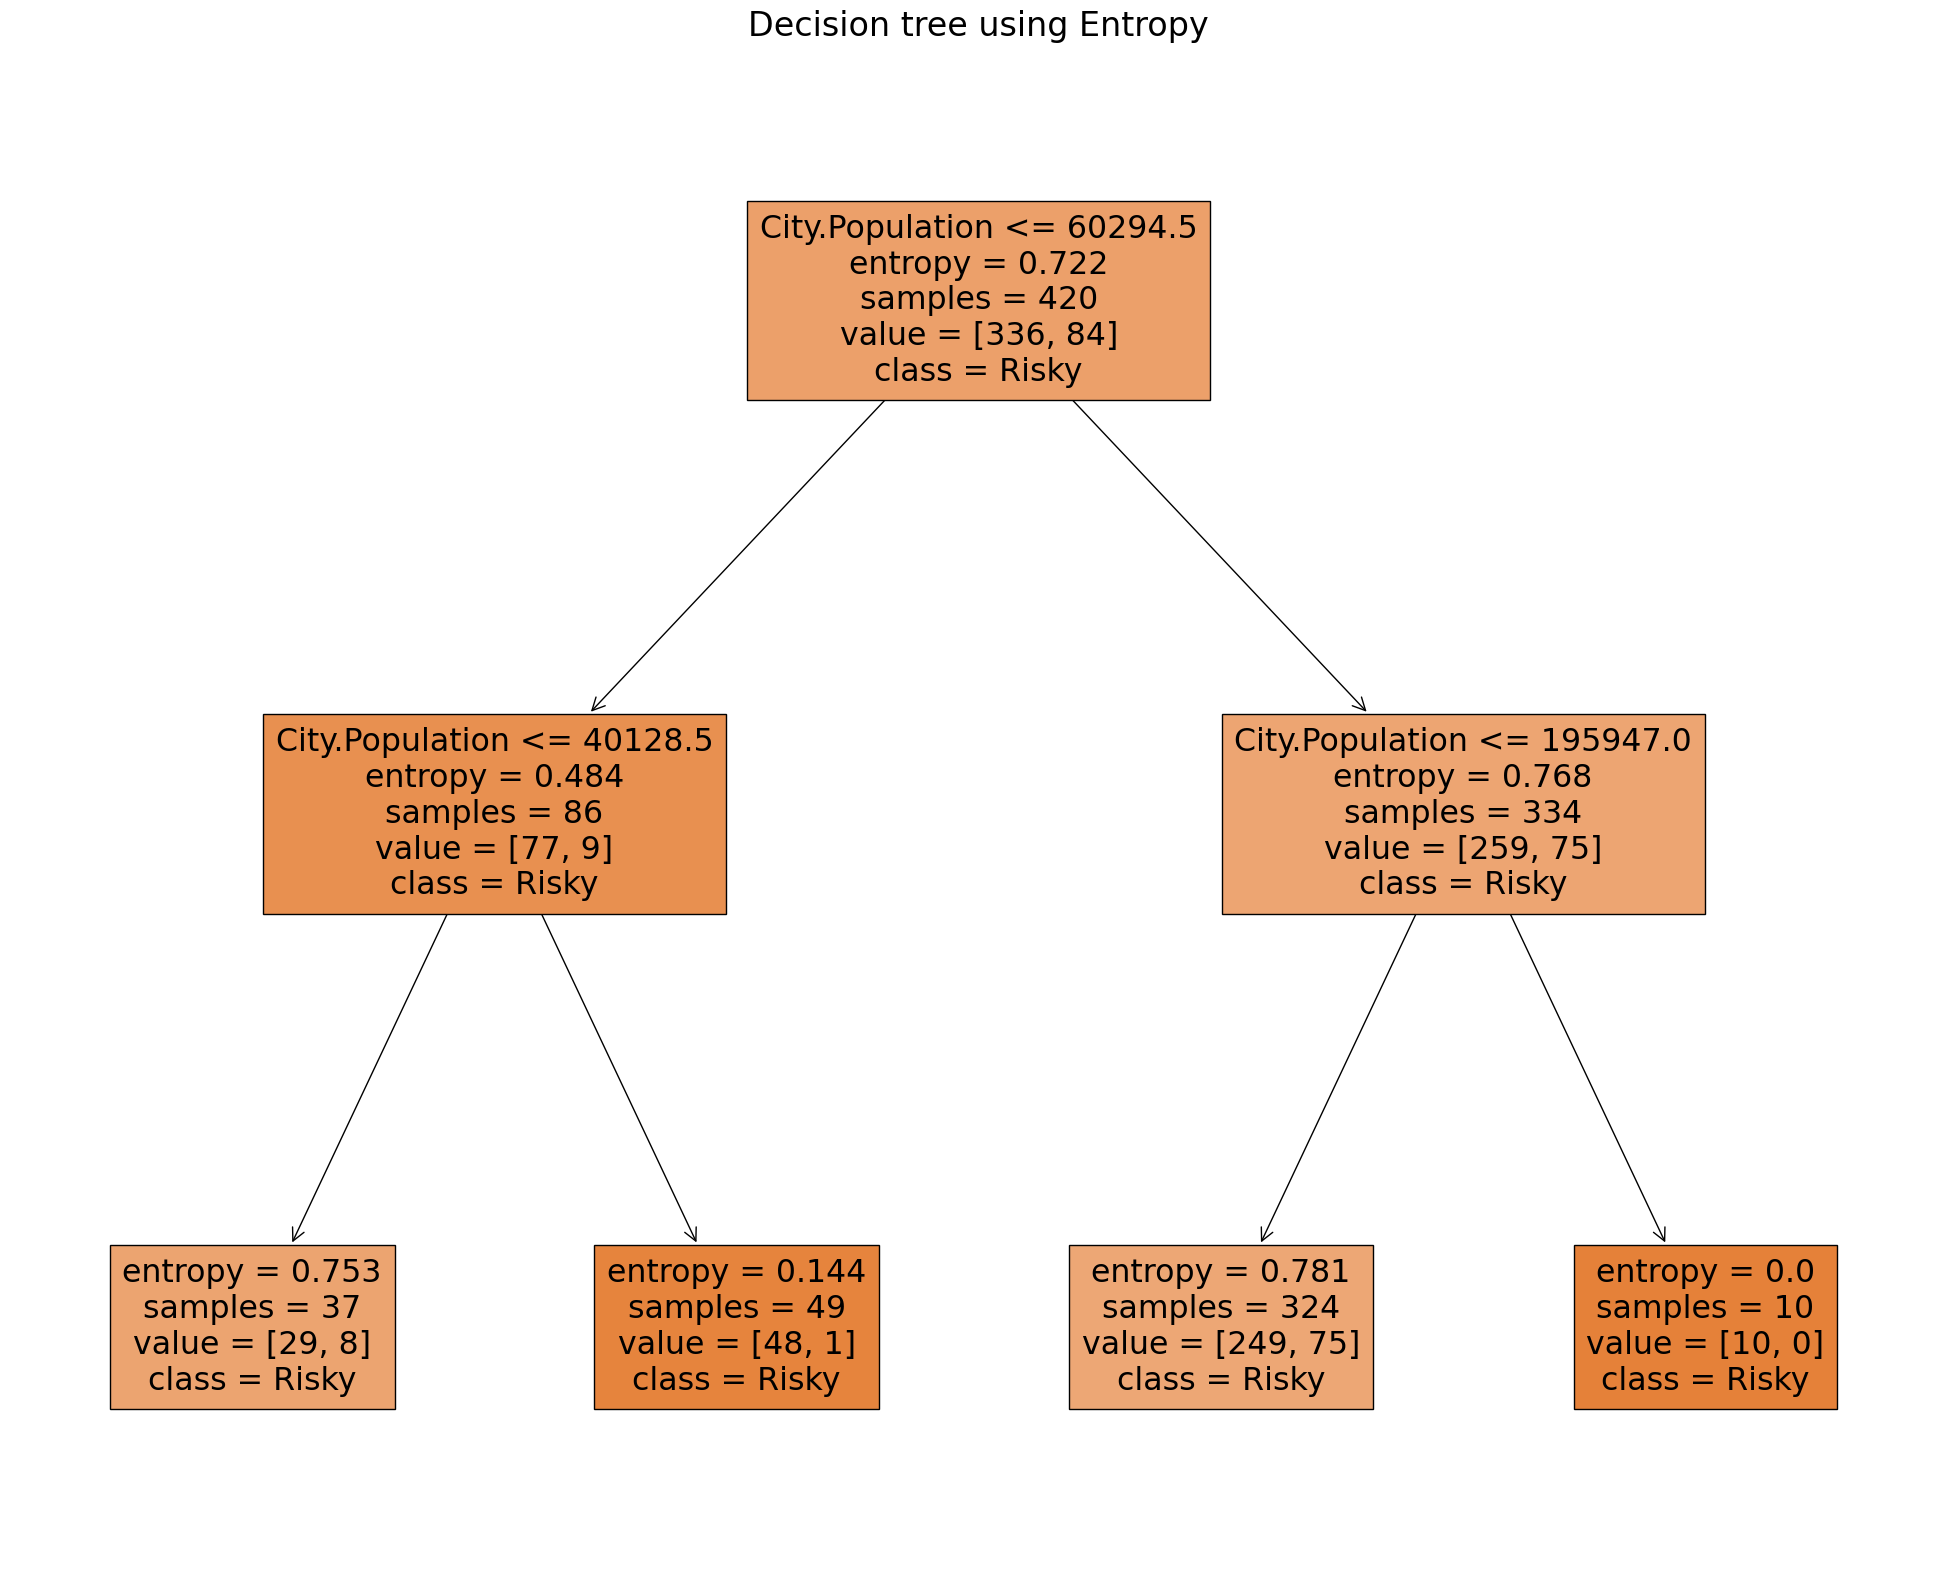

In [60]:

fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model,
                     feature_names= ['Undergrad','Marital.Status','City.Population','Work.Experience'], class_names= ['Risky', 'Good'], filled=True)
plt.title('Decision tree using Entropy',fontsize=24)

# Building Decision Tree Classifier (CART) using Gini Criteria

In [61]:

from sklearn.tree import DecisionTreeClassifier
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=2)


In [62]:
model_gini.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=2)

In [63]:
pred=model.predict(x_test)
np.mean(preds==y_test)

0.7777777777777778

Text(0.5, 1.0, 'Decision tree using Gini')

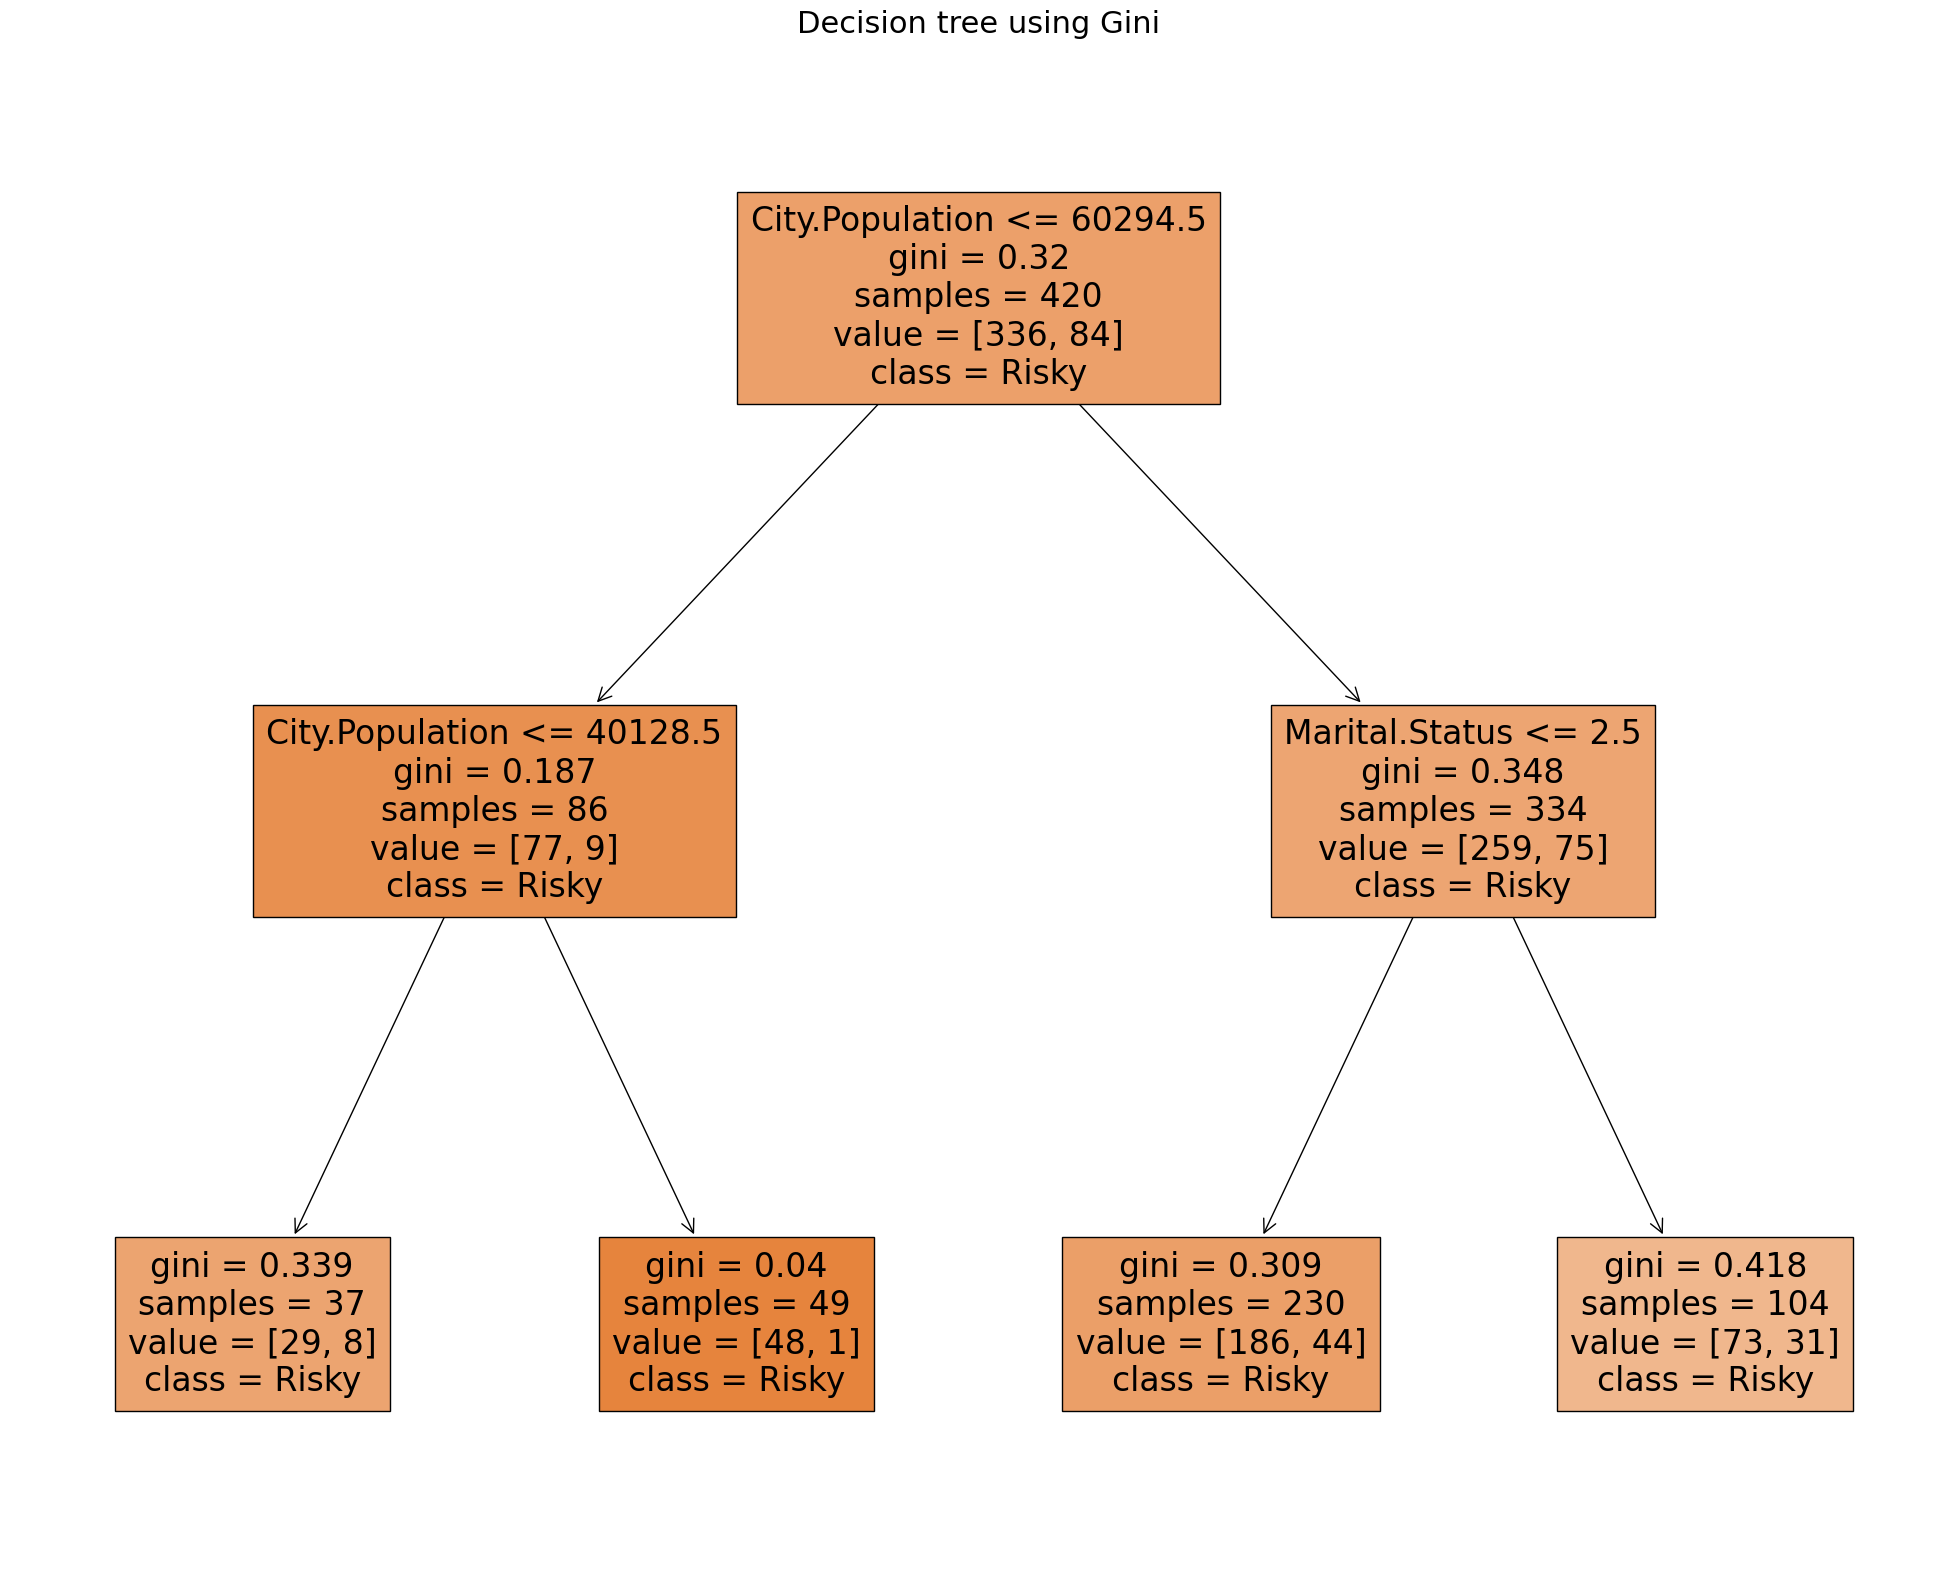

In [64]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model_gini,
                     feature_names= ['Undergrad','Marital.Status','City.Population','Work.Experience'], class_names= ['Risky', 'Good'], filled=True)
plt.title('Decision tree using Gini',fontsize=22)

Hence from here we can understanf that most important features out of here is marital status and city count